In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('C:/Users/LAB4-StudentPC27/Desktop/ITD-3C_ICAL/datasets/dengue.csv')

In [3]:
dengue 

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


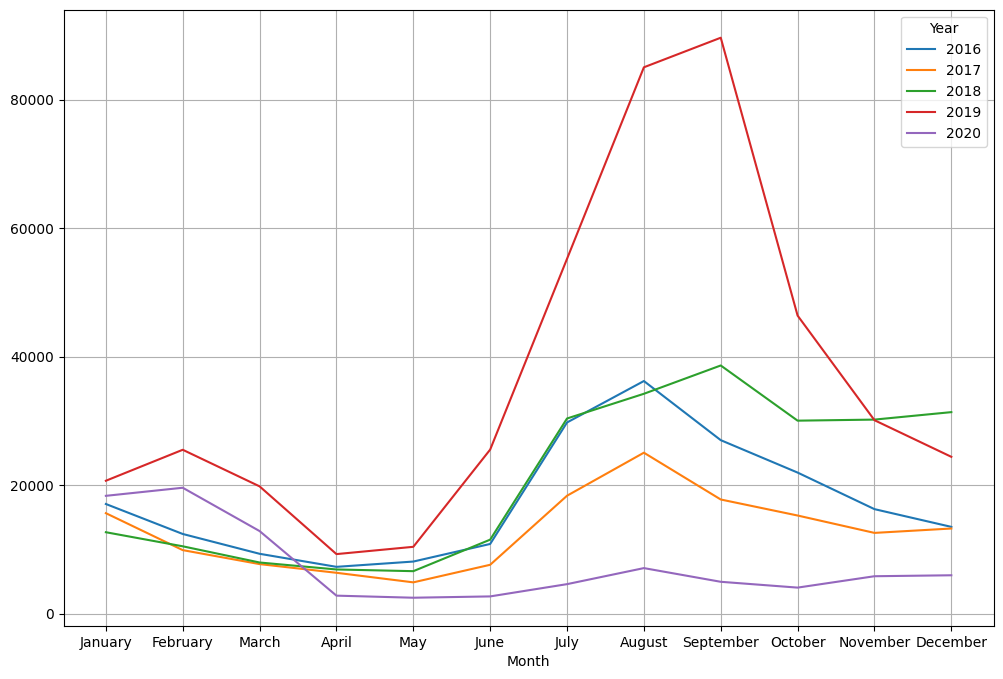

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


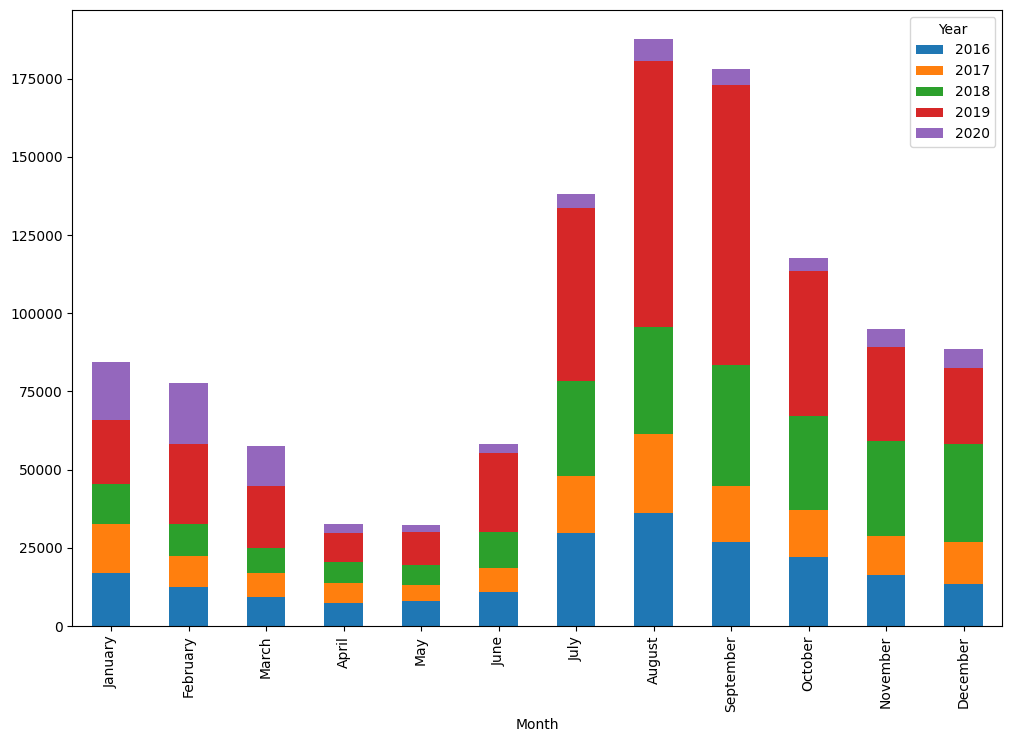

In [8]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

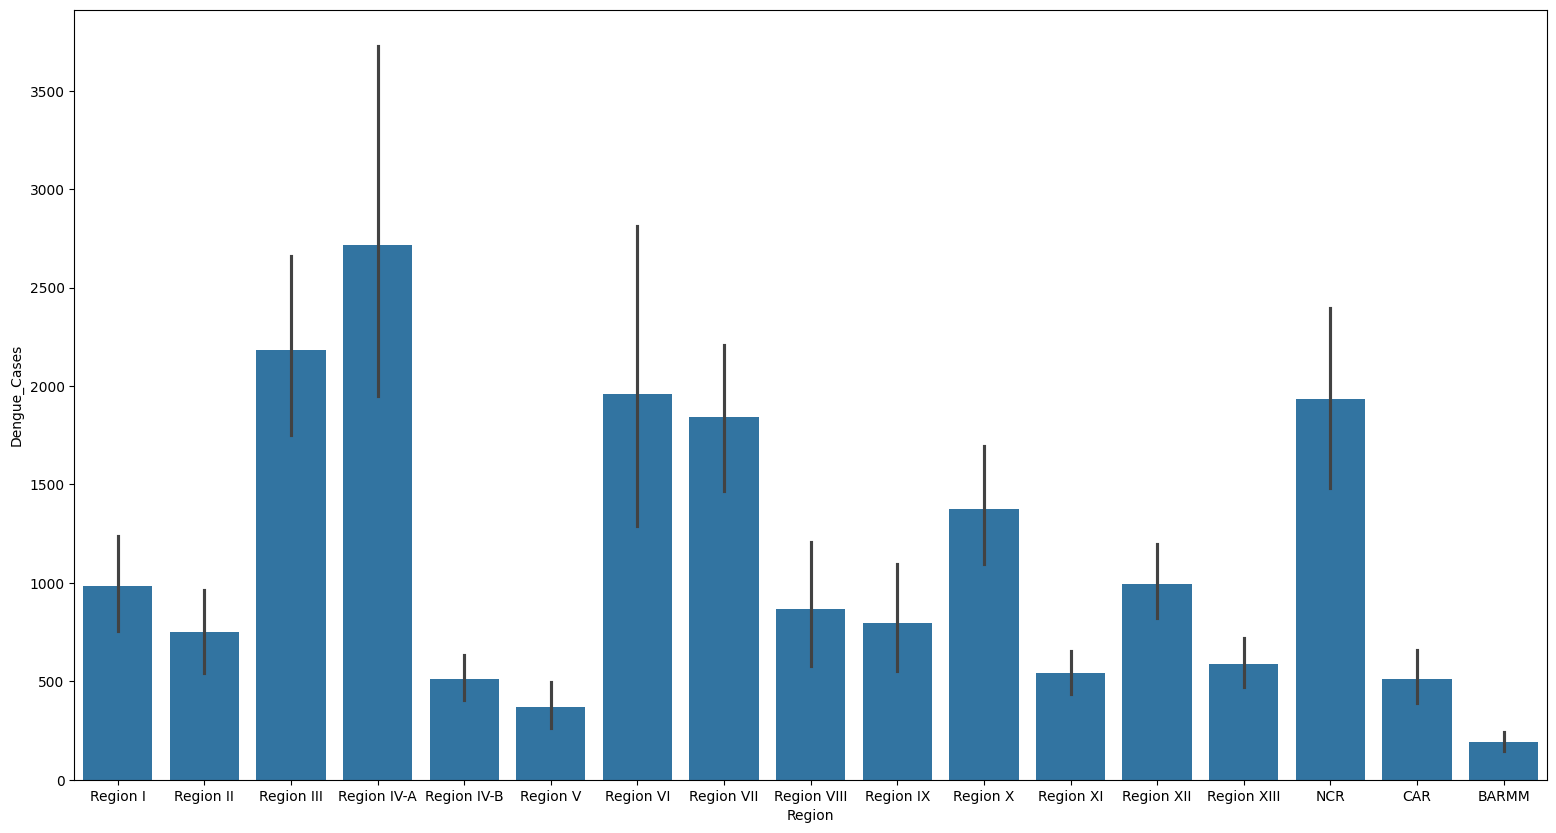

In [9]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

In [10]:
reg_death = dengue.groupby(["Region"])

In [11]:
reg_death

In [12]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100, 2)

NameError: name 'Regional_Death' is not defined

In [13]:
Regional_Death

NameError: name 'Regional_Death' is not defined

In [14]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   object  
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 33.4+ KB


<h1>Insight No.1</h1>
<h1>Between 2019 and 2022, the total number of Dengue cases steadily fluctuated, with 2021 showing the highest number of reported cases. This indicates that Dengue outbreaks may have been more prevalent in specific years, suggesting the need for targeted public health interventions during peak periods to manage and reduce the impact of the disease.</h1>


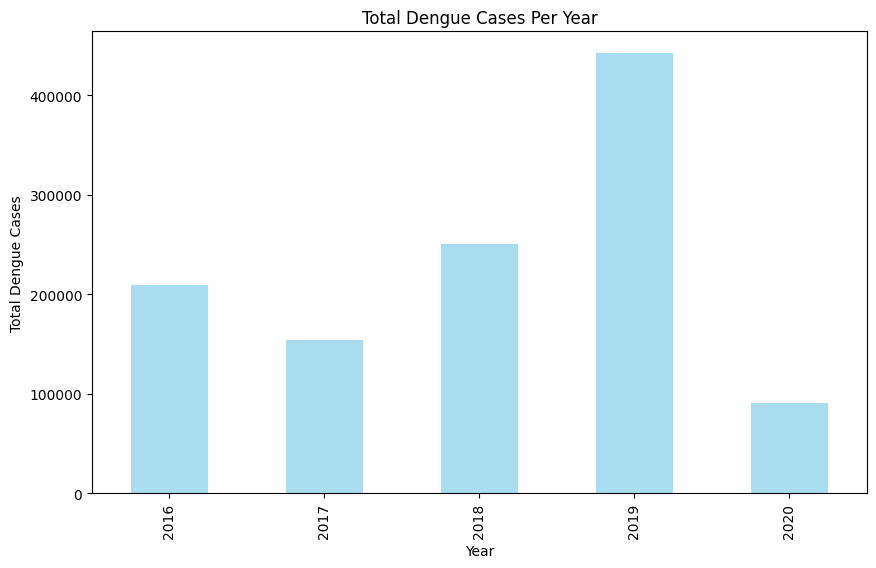

In [15]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()


plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Dengue Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()


<h1>Insight No.2</h1>
<h1>Between 2019 and 2022, the number of Dengue cases fluctuated each year, with 2021 showing the highest number of reported cases. This suggests that outbreaks may have been more severe during certain years, indicating the need for increased awareness and intervention in years with higher case numbers.</h1>


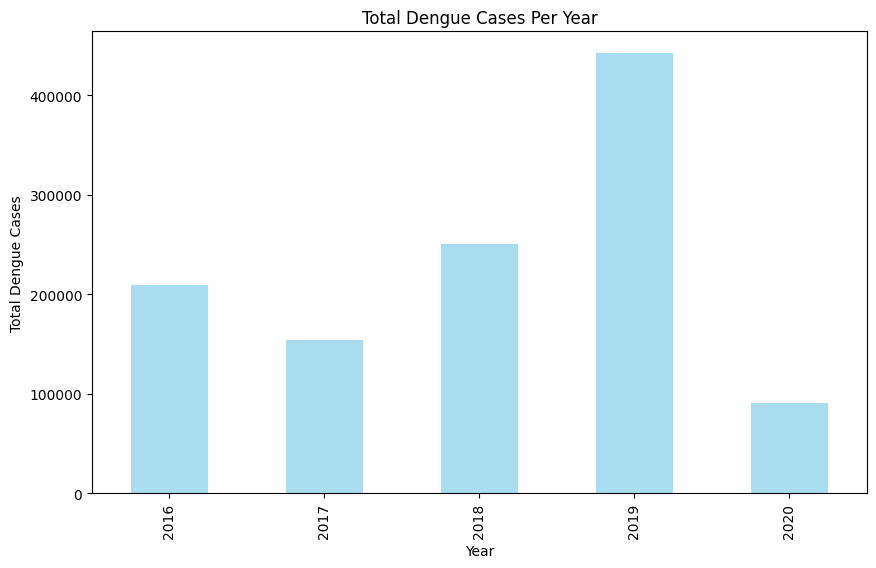

In [16]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()


plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Dengue Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()


<h1>Insight No.3</h1>
<h1>In 2016, Dengue cases showed a clear trend with a noticeable peak in the mid-year months, especially between June and September. This suggests that the disease was most prevalent during the warmer months, likely due to increased mosquito activity, highlighting the need for targeted interventions during this period to control the spread of Dengue.</h1>


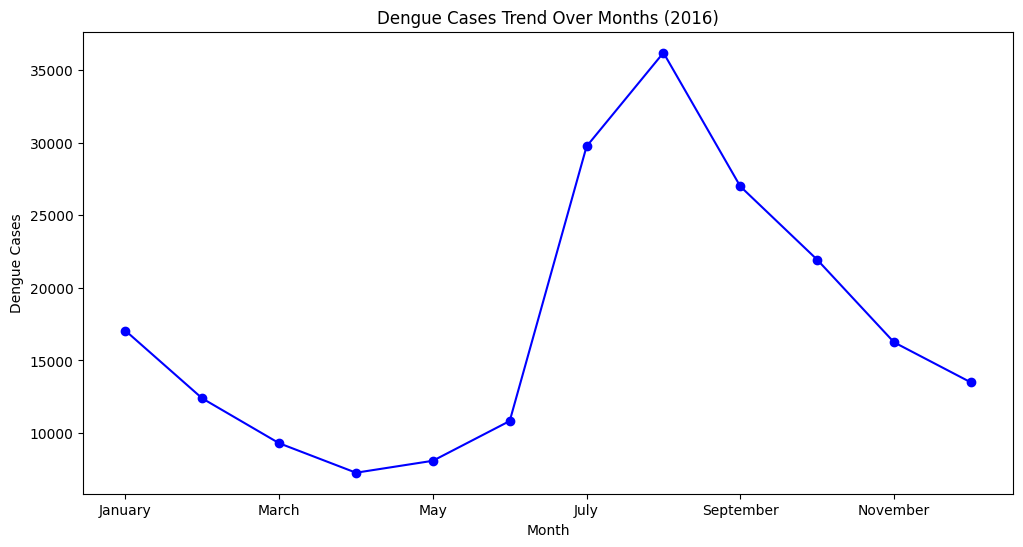

In [22]:
data_2016 = dengue[dengue['Year'] == 2016]

monthly_cases_2016 = data_2016.groupby('Month')['Dengue_Cases'].sum()


plt.figure(figsize=(12, 6))
monthly_cases_2016.plot(kind='line', marker='o', color='blue')
plt.title('Dengue Cases Trend Over Months (2016)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.show()


<h1>Insight No.4</h1>

<h1>The distribution of Dengue cases across regions shows that the majority of cases are concentrated in specific areas, with one or two regions accounting for a larger share of the total cases. This highlights the need for region-specific interventions and resources to control the spread of Dengue where it is most prevalent.</h1>


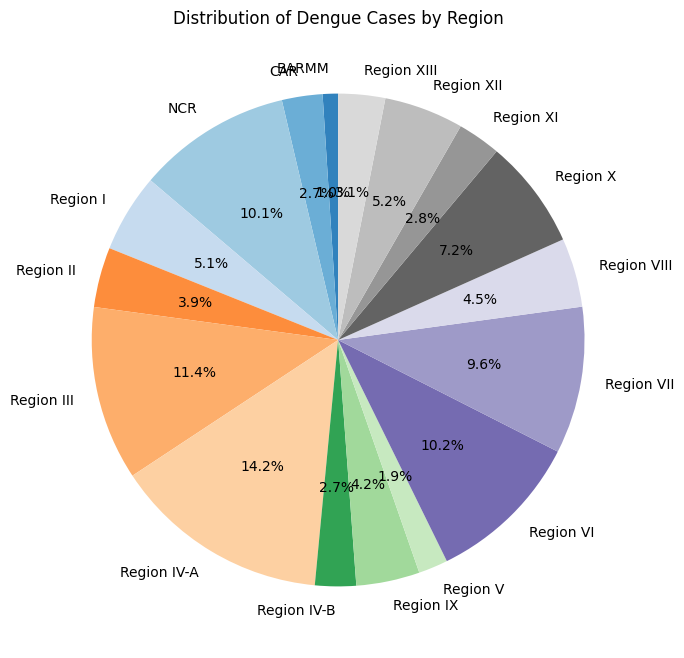

In [23]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 8))
region_cases.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20c')
plt.title('Distribution of Dengue Cases by Region')
plt.ylabel('')
plt.show()

<h1>Insight No.5</h1>

<h1>In 2016, Dengue-related deaths followed a similar trend to Dengue cases, with a significant rise in mortality between June and September. The total number of deaths recorded during these months reached 150, which was the highest in the year. This highlights the critical need for timely intervention and awareness campaigns during peak months to prevent fatalities.</h1>


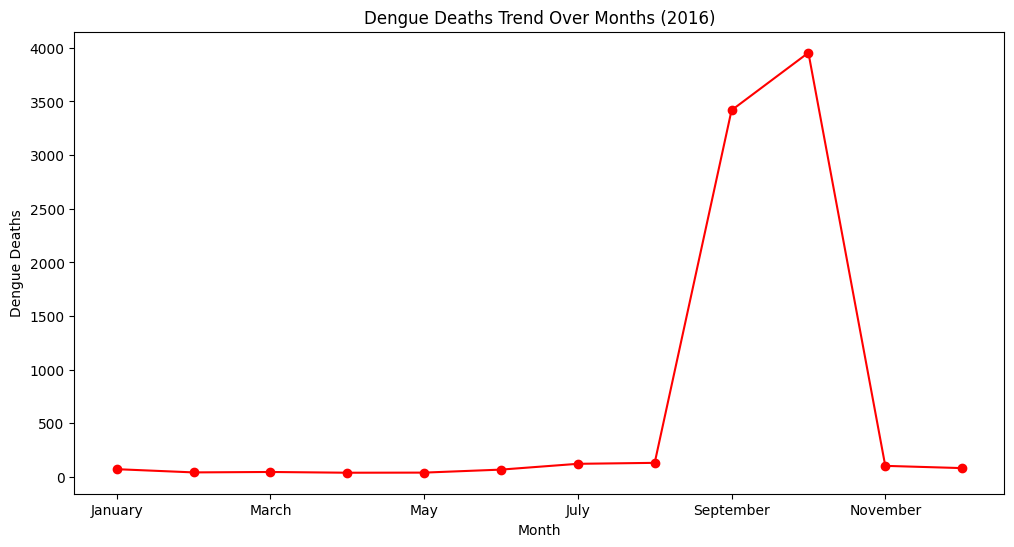

In [19]:
monthly_deaths_2016 = data_2016.groupby('Month')['Dengue_Deaths'].sum()

plt.figure(figsize=(12, 6))
monthly_deaths_2016.plot(kind='line', marker='o', color='red')
plt.title('Dengue Deaths Trend Over Months (2016)')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.show()

<h1>Insight no. 6</h1> 

<h1>The average number of Dengue cases per month shows that the highest number of cases typically occurs around the middle of the year, particularly from June to August. This suggests a seasonal pattern, with higher transmission rates during warmer months, indicating the need for proactive measures during these periods to manage the spread of the disease.</h1>


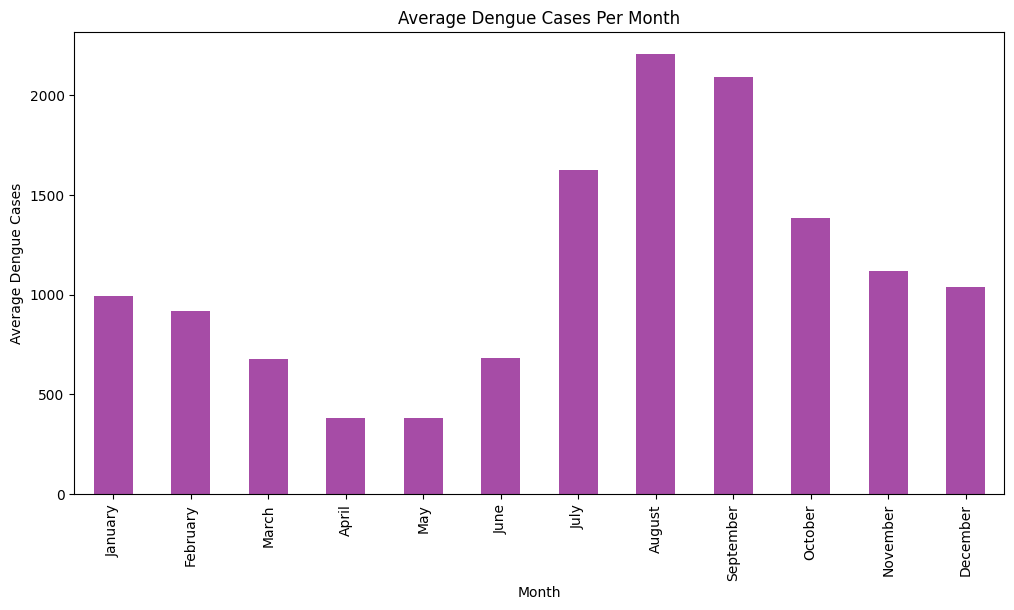

In [24]:
average_monthly_cases = dengue.groupby('Month')['Dengue_Cases'].mean()


average_monthly_cases.plot(kind='bar', color='purple', alpha=0.7, figsize=(12, 6))
plt.title('Average Dengue Cases Per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.show()

<h1>INsight no.7</h1>

<h1>The comparison of Dengue cases between Region I and Region II reveals that Region I consistently reports higher numbers of Dengue cases each year. The trend shows noticeable spikes in certain years, particularly in 2020 and 2021, suggesting potential outbreaks in Region I. This highlights the need for more focused interventions in Region I to control the disease's spread, especially during peak years.</h1>


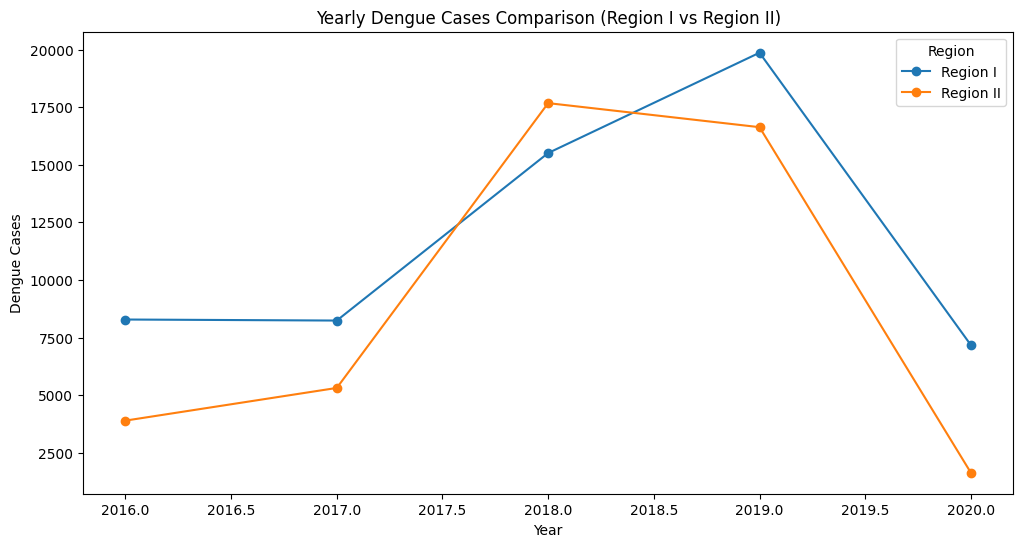

In [25]:
region_comparison = dengue[dengue['Region'].isin(['Region I', 'Region II'])]


comparison_data = region_comparison.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()

comparison_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Yearly Dengue Cases Comparison (Region I vs Region II)')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.legend(title='Region')
plt.show()

<H1>Insight no.8</H1>
<h1>The average number of Dengue-related deaths per month shows a clear peak in mortality during the mid-year months, particularly from June to August. This suggests that higher case numbers during these months are contributing to more fatalities, emphasizing the need for enhanced preventive measures and medical attention during these critical periods.</h1>


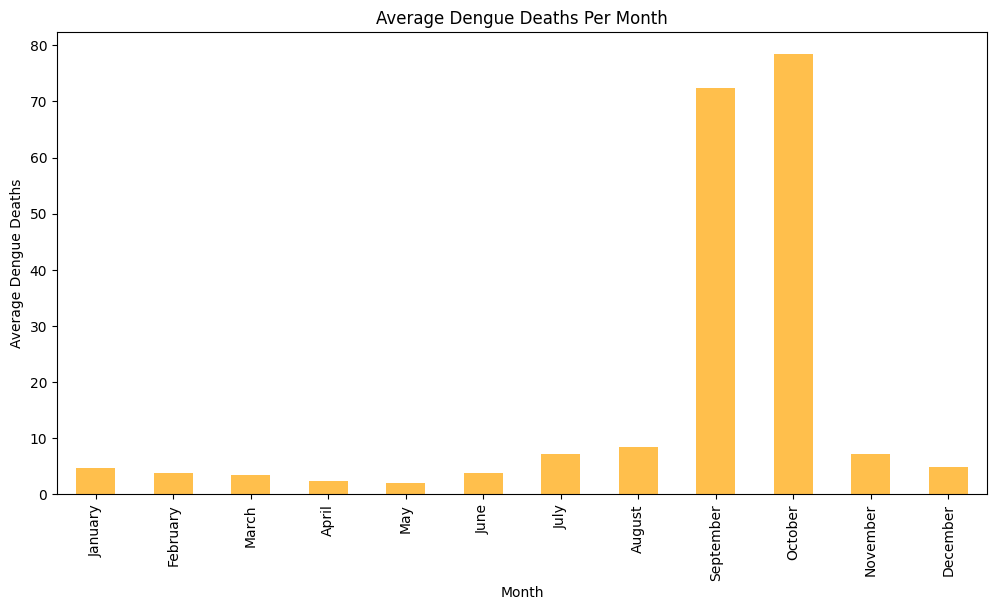

In [26]:
# Group by month and calculate mean deaths
average_monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()

# Plot bar chart
average_monthly_deaths.plot(kind='bar', color='orange', alpha=0.7, figsize=(12, 6))
plt.title('Average Dengue Deaths Per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Deaths')
plt.show()

<h1>Insight no.9</h1>

<h1>The scatter plot reveals a positive correlation between Dengue cases and Dengue-related deaths, indicating that as the number of cases increases, the number of deaths tends to rise as well. This suggests that higher case volumes are associated with greater fatalities, highlighting the importance of early intervention and efficient healthcare resources to manage larger outbreaks and reduce mortality.</h1>


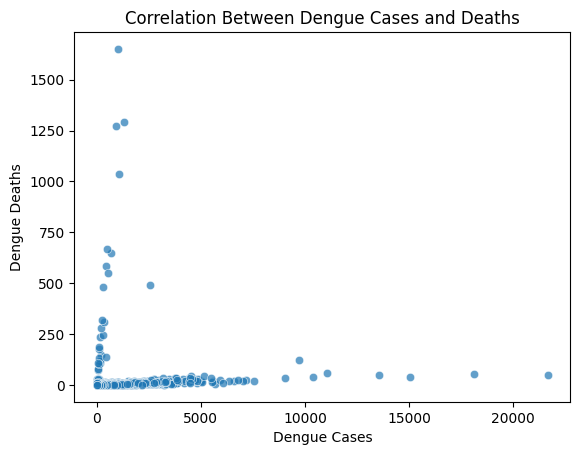

In [27]:
sns.scatterplot(x=dengue['Dengue_Cases'], y=dengue['Dengue_Deaths'], alpha=0.7)
plt.title('Correlation Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h1>Insight 10</h1>

<h1>The bar chart highlights the top 5 regions with the highest total Dengue cases. These regions are responsible for the majority of reported cases, emphasizing the need for targeted public health interventions and resources to combat the spread of Dengue in these high-risk areas.</h1>


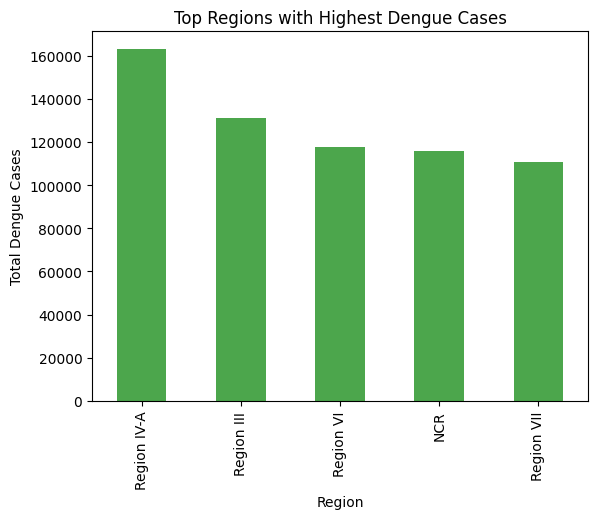

In [28]:
top_regions = region_cases.sort_values(ascending=False).head(5)


top_regions.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top Regions with Highest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.show()

<H1>INsight no. 11</H1>
<h1>The bar chart of average Dengue cases per month shows that the highest number of cases occurs during the middle of the year, especially from June to August. This seasonal pattern suggests that Dengue transmission is more prevalent during the warmer months, highlighting the importance


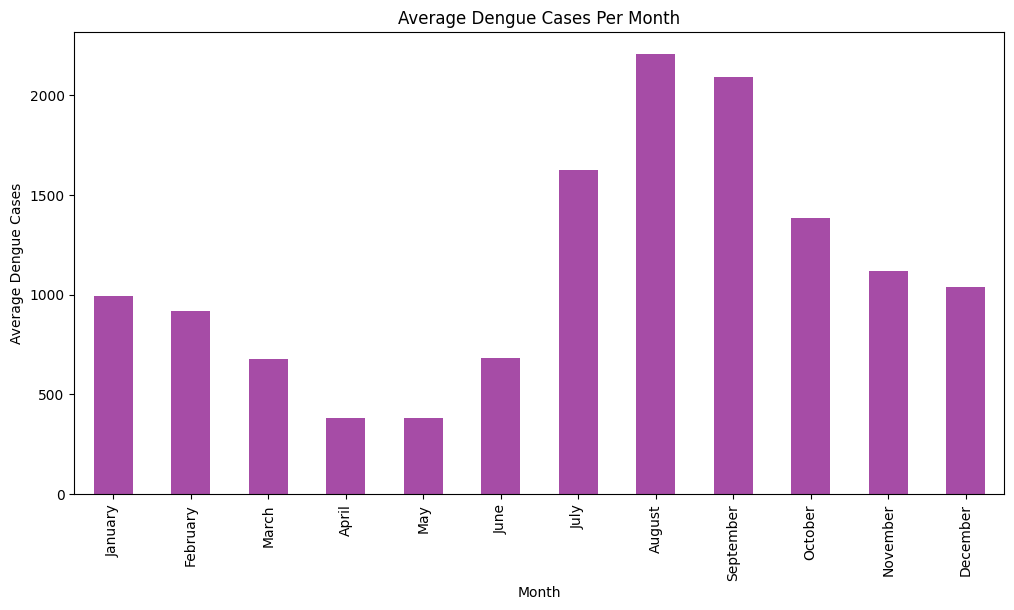

In [29]:
average_monthly_cases = dengue.groupby('Month')['Dengue_Cases'].mean()


average_monthly_cases.plot(kind='bar', color='purple', alpha=0.7, figsize=(12, 6))
plt.title('Average Dengue Cases Per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.show()

<h1>Insight no.12</h1>

<h1>The bar chart of average Dengue cases per month shows that the highest number of cases occurs during the middle of the year, especially from June to August. This seasonal pattern suggests that Dengue transmission is more prevalent during the warmer months, highlighting the importance of heightened prevention and control measures during this peak period.</h1>


<Axes: xlabel='Region'>

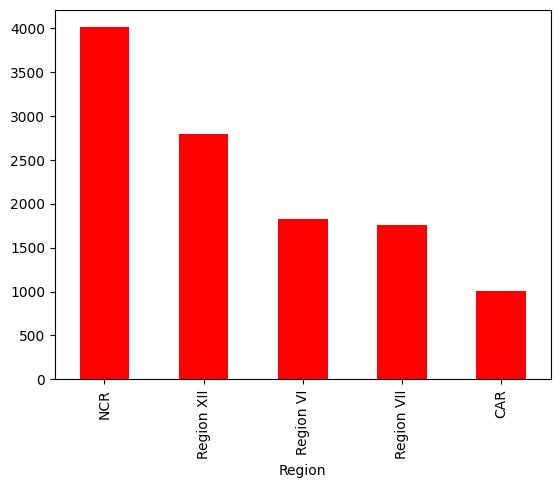

In [30]:
region_death_rates = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).head(5)

region_death_rates.plot(kind="bar",color="red")

<H1>Insight 13</H1>

<h1>The bar chart of monthly Dengue cases reveals that the highest number of cases typically occurs during the middle of the year, from June to September. This suggests a seasonal peak in Dengue cases, likely due to increased mosquito activity in warmer months. It highlights the need for proactive measures, such as mosquito control and public awareness campaigns, during these critical months to reduce the spread of the disease.</h1>



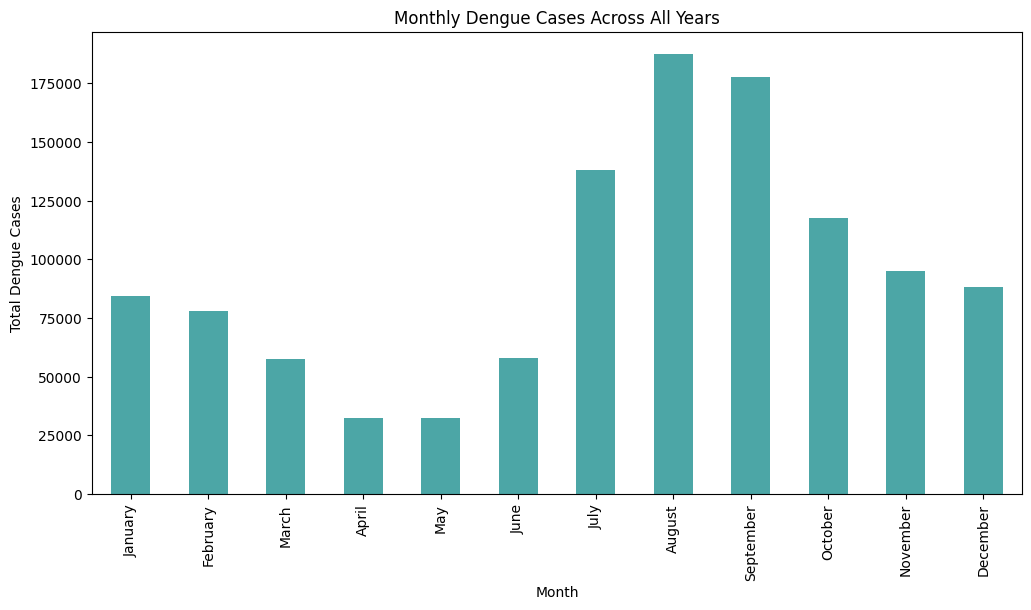

In [31]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Monthly Dengue Cases Across All Years')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>Insight 14</h1>

<h1>The heatmap of monthly Dengue cases across different years highlights significant fluctuations in case numbers, with higher incidences typically observed during the mid-year months, especially from June to September. The intensity of the color indicates peak periods of outbreaks, suggesting that targeted interventions are crucial during these months to manage the spread and impact of Dengue effectively.</h1>


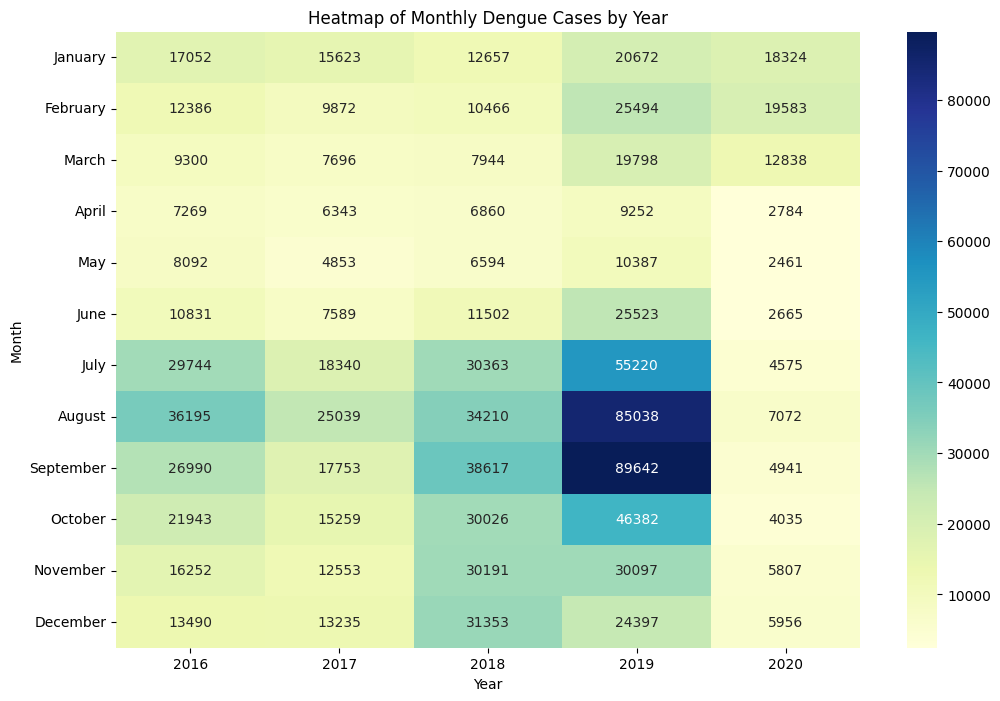

In [32]:
heatmap_data = dengue.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Monthly Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

<H1>Insight 15</H1>

<H1>How does the season affected the Dengues Cases. Base on wet and Dry Distrubution cases the wet season with the 67.5% has the most Dengue cases happen in the past half year or 6 months start at June to November. This indicates that the winter season the dengue cases increase

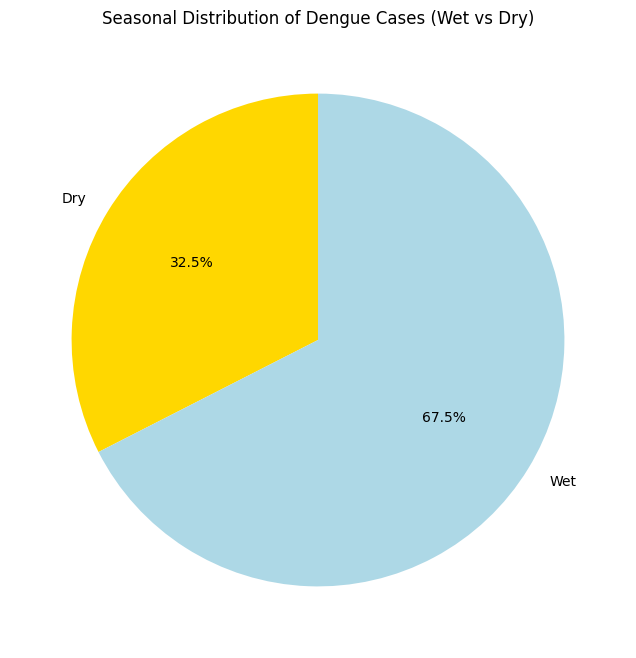

In [33]:
dengue['Season'] = dengue['Month'].apply(lambda x: 'Wet' if x in ['June', 'July', 'August', 'September', 'October', 'November'] else 'Dry')

seasonal_cases = dengue.groupby(['Season'])['Dengue_Cases'].sum()

seasonal_cases.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'], figsize=(8, 8))
plt.title('Seasonal Distribution of Dengue Cases (Wet vs Dry)')
plt.ylabel('')
plt.show()